<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Q3 Training Models (20 points)

**Please include all the write up answers below to theory.ipynb. For the questions need code, you need to include the screenshot of code to theory.ipynb to get points.**


First, be sure to run the script, from inside the scripts folder, `get_data.sh`. This will use `wget` and `unzip` to download 

http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip


http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip

and extract them to **data** and **image** folders


Since our input images are $32\times 32$ images, unrolled into one 1024 dimensional vector, that gets multiplied by $\textbf{W}^{(1)}$, each row of $\textbf{W}^{(1)}$ can be seen as a weight image. Reshaping each row into a $32\times 32$ image can give us an idea of what types of images each unit in the hidden layer has a high response to.

We have provided you three data **.mat** files to use for this section. The training data in **nist36\_train.mat** contains samples for each of the 26 upper-case letters of the alphabet and the 10 digits. This is the set you should use for training your network. The cross-validation set in **nist36\_valid.mat** contains samples from each class, and should be used in the training loop to see how the network is performing on data that it is not training on. This will help to spot over fitting. Finally, the test data in **nist36\_test.mat** contains testing data, and should be used for the final evaluation on your best model to see how well it will generalize to new unseen data.

### Q3.1 (8 points Autograder)
Train a network from scratch. Use a single hidden layer with 64 hidden units, and train for at least 30 epochs. **Modify** the script to generate two plots: one showing the accuracy on both the training and validation set over the epochs, and the other showing the cross-entropy loss averaged over the data. The x-axis should represent the epoch number, while the y-axis represents the accuracy or loss. With these settings, you should see an accuracy on the validation set of at least 75\%.

In [5]:
import numpy as np
import scipy.io
from ipynb.fs.defs.q2 import *

In [11]:
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

max_iters = 80
# pick a batch size, learning rate
batch_size = 64
learning_rate = 2.5e-3
# YOUR CODE HERE
# raise NotImplementedError()
hidden_size = 64

batches = get_random_batches(train_x,train_y,batch_size)
batch_num = len(batches)

params = {}

# initialize layers (named "layer1" and "output") here
# YOUR CODE HERE
initialize_weights(1024,64,params,'layer1')
initialize_weights(64,36,params,'output')
#raise NotImplementedError()


# with default settings, you should get loss < 150 and accuracy > 80%
for itr in range(max_iters):
    total_loss = 0
    total_acc = 0
    for xb,yb in batches:
        # training loop can be exactly the same as q2!
        # YOUR CODE HERE
            h1 = forward(xb, params, 'layer1', sigmoid)
            probs = forward(h1, params, 'output', softmax)
            # raise NotImplementedError()
            
            # loss
            # be sure to add loss and accuracy to epoch totals
            # YOUR CODE HERE
            ls, acc = compute_loss_and_acc(yb , probs)
            total_loss = total_loss + ls
            total_acc = total_acc + acc
            # raise NotImplementedError()
            
            # backward
            # YOUR CODE HERE
            delta = probs - yb
            delta1 = backwards(delta, params, 'output', linear_deriv)
            delta2 = backwards(delta1, params, 'layer1', sigmoid_deriv)
            
            # raise NotImplementedError()
            params['Woutput'] = params['Woutput'] - (learning_rate * params['grad_Woutput'])
            params['boutput'] = params['boutput'] - (learning_rate * params['grad_boutput'])
            params['Wlayer1'] = params['Wlayer1'] - (learning_rate * params['grad_Wlayer1'])
            params['blayer1'] = params['blayer1'] - (learning_rate * params['grad_blayer1'])
        #raise NotImplementedError()
    total_acc = total_acc / len(batches)
    # total_loss = total_loss / batch_size
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,total_acc))

# run on validation set and report accuracy! should be above 75%
valid_acc = 0
# YOUR CODE HERE
h1 = forward(valid_x, params, 'layer1', sigmoid)
probs = forward(h1, params, 'output', softmax)
# raise NotImplementedError()

# loss
# be sure to add loss and accuracy to epoch totals
# YOUR CODE HERE
ls, acc = compute_loss_and_acc(valid_y , probs)
valid_acc = acc
# raise NotImplementedError()
print('Validation accuracy: ',valid_acc)

itr: 00 	 loss: 36615.21 	 acc : 0.13
itr: 02 	 loss: 23738.52 	 acc : 0.50
itr: 04 	 loss: 17259.91 	 acc : 0.61
itr: 06 	 loss: 14294.01 	 acc : 0.66
itr: 08 	 loss: 12582.79 	 acc : 0.69
itr: 10 	 loss: 11402.30 	 acc : 0.72
itr: 12 	 loss: 10499.85 	 acc : 0.74
itr: 14 	 loss: 9768.07 	 acc : 0.76
itr: 16 	 loss: 9151.77 	 acc : 0.78
itr: 18 	 loss: 8618.38 	 acc : 0.79
itr: 20 	 loss: 8147.19 	 acc : 0.80
itr: 22 	 loss: 7724.46 	 acc : 0.81
itr: 24 	 loss: 7340.84 	 acc : 0.82
itr: 26 	 loss: 6989.72 	 acc : 0.83
itr: 28 	 loss: 6666.25 	 acc : 0.84
itr: 30 	 loss: 6366.77 	 acc : 0.85
itr: 32 	 loss: 6088.37 	 acc : 0.86
itr: 34 	 loss: 5828.64 	 acc : 0.87
itr: 36 	 loss: 5585.55 	 acc : 0.87
itr: 38 	 loss: 5357.36 	 acc : 0.88
itr: 40 	 loss: 5142.59 	 acc : 0.89
itr: 42 	 loss: 4939.99 	 acc : 0.89
itr: 44 	 loss: 4748.53 	 acc : 0.90
itr: 46 	 loss: 4567.33 	 acc : 0.90
itr: 48 	 loss: 4395.63 	 acc : 0.90
itr: 50 	 loss: 4232.76 	 acc : 0.91
itr: 52 	 loss: 4078.11 	 acc :

In [4]:
assert 'Wlayer1' in params
assert 'Woutput' in params


### Q3.2 (3 points Code+WriteUp)
Use your modified training script to train three networks, one with your best learning rate, one with 10 times that learning rate and one with one tenth that learning rate. Include all 6 plots in your writeup. Comment on how the learning rates affect the training, and report the final accuracy of the best network on the test set.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [9]:
# Please put your code for Q3.2 here

def traindatacr(train_x, train_y, valid_x, valid_y, test_x, test_y, max_iters, batch_size, learning_rate):
    hidden_size = 64

    batches = get_random_batches(train_x,train_y,batch_size)
    batch_num = len(batches)

    params = {}

    # initialize layers (named "layer1" and "output") here
    # YOUR CODE HERE
    initialize_weights(1024,64,params,'layer1')
    initialize_weights(64,36,params,'output')
    Taccuracies = []
    Tlosses = []
    Vaccuracies = []
    Vlosses = []
    # with default settings, you should get loss < 150 and accuracy > 80%
    for itr in range(max_iters):
        total_loss = 0
        total_acc = 0
        for xb,yb in batches:
            # training loop can be exactly the same as q2!
                h1 = forward(xb, params, 'layer1', sigmoid)
                probs = forward(h1, params, 'output', softmax)
                # loss
                # be sure to add loss and accuracy to epoch totals
                ls, acc = compute_loss_and_acc(yb , probs)
                total_loss = total_loss + ls
                total_acc = total_acc + acc
                # backward
                delta = probs - yb
                delta1 = backwards(delta, params, 'output', linear_deriv)
                delta2 = backwards(delta1, params, 'layer1', sigmoid_deriv)
                params['Woutput'] = params['Woutput'] - (learning_rate * params['grad_Woutput'])
                params['boutput'] = params['boutput'] - (learning_rate * params['grad_boutput'])
                params['Wlayer1'] = params['Wlayer1'] - (learning_rate * params['grad_Wlayer1'])
                params['blayer1'] = params['blayer1'] - (learning_rate * params['grad_blayer1'])
        total_acc = total_acc / len(batches)
        Taccuracies.append(total_acc)
        Tlosses.append(total_loss)
        # run on validation set and report accuracy! should be above 75%
        valid_acc = 0
        h1 = forward(valid_x, params, 'layer1', sigmoid)
        probs = forward(h1, params, 'output', softmax)
        # loss
        # be sure to add loss and accuracy to epoch totals
        vls, vacc = compute_loss_and_acc(valid_y , probs)
        valid_acc = vacc
        Vaccuracies.append(valid_acc)
        Vlosses.append(vls)

    test_acc = 0
    h1 = forward(test_x, params, 'layer1', sigmoid)
    probs = forward(h1, params, 'output', softmax)

    # loss
    # be sure to add loss and accuracy to epoch totals
    vls, tacc = compute_loss_and_acc(test_y , probs)
    test_acc = tacc
    
    return Taccuracies, Tlosses, Vaccuracies, Vlosses, test_acc

In [14]:
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')
test_data = scipy.io.loadmat('data/nist36_test.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']
test_x, test_y = test_data['test_data'], test_data['test_labels']

lr1TA, lr1TL, lr1VA, lr1VL, test_accuarcy1 = traindatacr(train_x, train_y, valid_x, valid_y, test_x, test_y, 80, 64, 2.5e-3)

Accuracy on test data is 0.7622222222222222 %


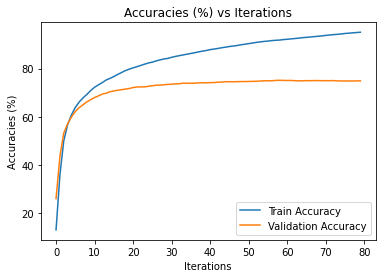

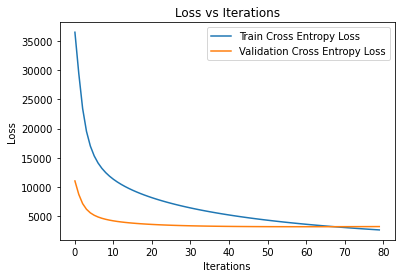

In [15]:
import matplotlib.pyplot as plt
print("Accuracy on test data is", test_accuarcy1, "%")

plt.figure()
plt.plot(np.arange(80), [i * 100 for i in lr1TA], label = "Train Accuracy")
plt.plot(np.arange(80), [i * 100 for i in lr1VA], label = "Validation Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(80), [i for i in lr1TL], label = "Train Cross Entropy Loss")
plt.plot(np.arange(80), lr1VL, label = "Validation Cross Entropy Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title("Loss vs Iterations")
plt.show()


In [79]:
lr2TA, lr2TL, lr2VA, lr2VL, test_accuarcy2 = traindatacr(train_x, train_y, valid_x, valid_y, test_x, test_y, 80, 64, 2.5e-4)

Accuracy on test data is 0.6916666666666667 %


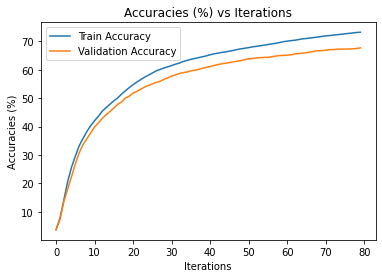

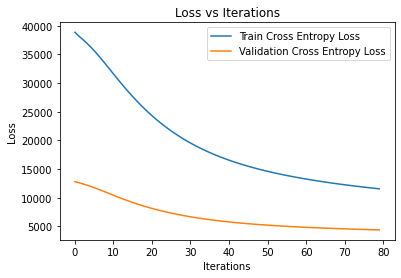

In [80]:
import matplotlib.pyplot as plt
print("Accuracy on test data is", test_accuarcy2, "%")

plt.figure()
plt.plot(np.arange(80), [i * 100 for i in lr2TA], label = "Train Accuracy")
plt.plot(np.arange(80), [i * 100 for i in lr2VA], label = "Validation Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(80), [i for i in lr2TL], label = "Train Cross Entropy Loss")
plt.plot(np.arange(80), lr2VL, label = "Validation Cross Entropy Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title("Loss vs Iterations")
plt.show()



In [16]:
lr3TA, lr3TL, lr3VA, lr3VL, test_accuarcy3 = traindatacr(train_x, train_y, valid_x, valid_y, test_x, test_y, 80, 64, 2.5e-2)

Accuracy on test data is 0.6411111111111111 %


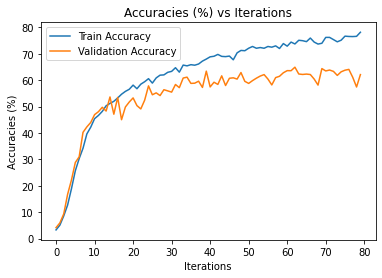

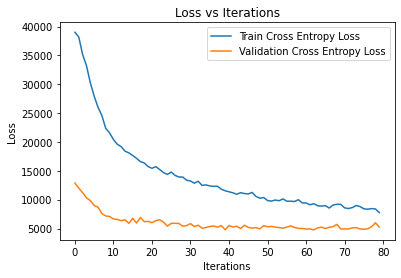

In [18]:
import matplotlib.pyplot as plt
print("Accuracy on test data is", test_accuarcy3, "%")

plt.figure()
plt.plot(np.arange(80), [i * 100 for i in lr3TA], label = "Train Accuracy")
plt.plot(np.arange(80), [i * 100 for i in lr3VA], label = "Validation Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracies (%)")
plt.legend(loc="best")
plt.title("Accuracies (%) vs Iterations")
plt.show()

plt.figure()
plt.plot(np.arange(80), [i for i in lr3TL], label = "Train Cross Entropy Loss")
plt.plot(np.arange(80), lr3VL, label = "Validation Cross Entropy Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.title("Loss vs Iterations")
plt.show()


### Q3.3 (2 points Code+WriteUp)
Visualize the first layer weights that your network learned. Compare these to the network weights immediately after initialization. Include both visualizations in your writeup. Comment on the learned weights. Do you notice any patterns?

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
# Please put your code for Q3.3 here
# YOUR CODE HERE
def traindatavs(train_x, train_y, valid_x, valid_y, test_x, test_y, max_iters, batch_size, learning_rate):
    hidden_size = 64
    batches = get_random_batches(train_x,train_y,batch_size)
    batch_num = len(batches)

    params = {}
    
    # initialize layers (named "layer1" and "output") here
    # YOUR CODE HERE
    initialize_weights(1024,64,params,'layer1')
    initialize_weights(64,36,params,'output')
    init_params = params['W' + 'layer1']
    
    # with default settings, you should get loss < 150 and accuracy > 80%
    for itr in range(max_iters):
        total_loss = 0
        total_acc = 0
        for xb,yb in batches:
            # training loop can be exactly the same as q2!
                h1 = forward(xb, params, 'layer1', sigmoid)
                probs = forward(h1, params, 'output', softmax)

                # loss
                # be sure to add loss and accuracy to epoch totals
                ls, acc = compute_loss_and_acc(yb , probs)
                total_loss = total_loss + ls
                total_acc = total_acc + acc
                # raise NotImplementedError()

                # backward
                delta = probs - yb
                delta1 = backwards(delta, params, 'output', linear_deriv)
                delta2 = backwards(delta1, params, 'layer1', sigmoid_deriv)

                params['Woutput'] = params['Woutput'] - (learning_rate * params['grad_Woutput'])
                params['boutput'] = params['boutput'] - (learning_rate * params['grad_boutput'])
                params['Wlayer1'] = params['Wlayer1'] - (learning_rate * params['grad_Wlayer1'])
                params['blayer1'] = params['blayer1'] - (learning_rate * params['grad_blayer1'])
        total_acc = total_acc / len(batches)

    print(total_acc)
    final_params = params['Wlayer1']
    return init_params, final_params

In [89]:
init_params, final_params = traindatavs(train_x, train_y, valid_x, valid_y, test_x, test_y, 80, 64, 2.5e-3)

0.9567307692307693


(1024, 64)


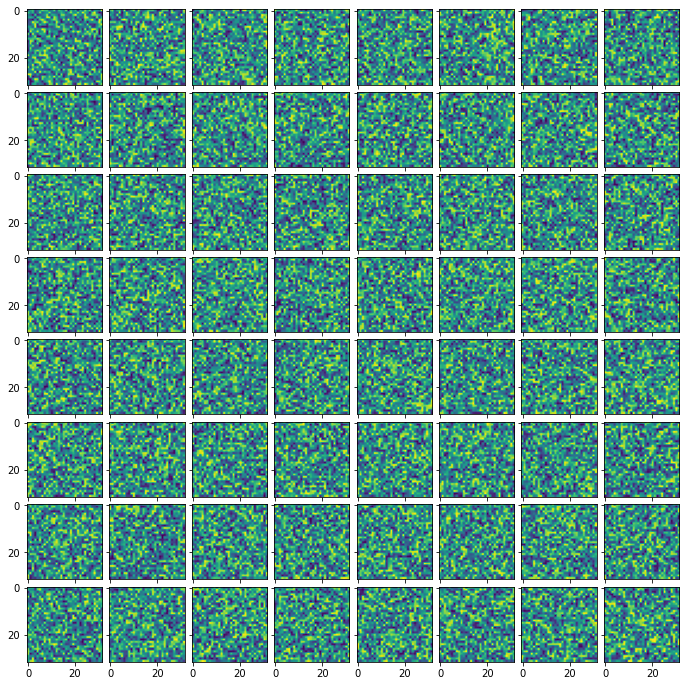

In [94]:
fig = plt.figure(figsize=(12., 12.))
ims = []
print(init_params.shape)
for i in range(64):
    ims.append(init_params[:,i].reshape((32,32)))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(8, 8),  
                 axes_pad=0.1,  
                 )

for ax, im in zip(grid, ims):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

(1024, 64)


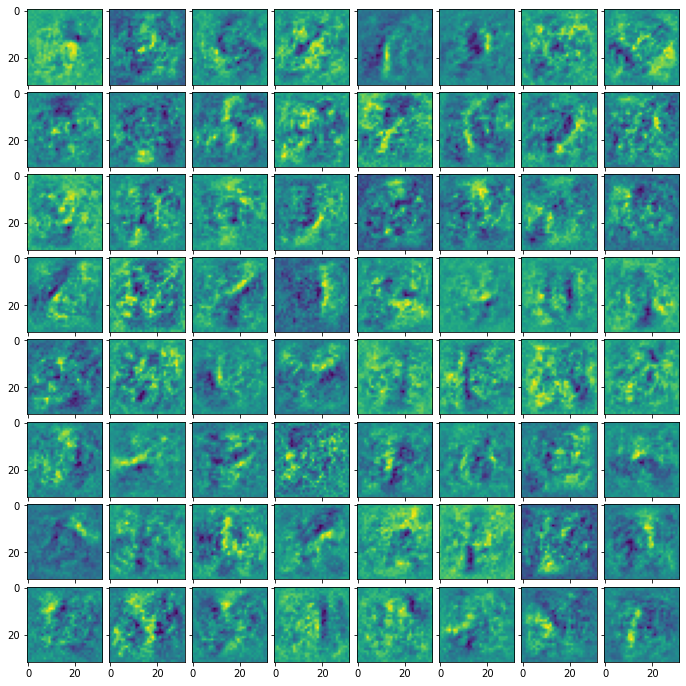

In [95]:
fig = plt.figure(figsize=(12., 12.))
ims = []
print(final_params.shape)
for i in range(64):
    ims.append(final_params[:,i].reshape((32,32)))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(8, 8),  
                 axes_pad=0.1,  
                 )

for ax, im in zip(grid, ims):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

#### Clearly we notice patterns in the final parameters, they seem to be the curves in letters and numbers. The network is trying to captures the features in these images to predict the labels

### Q3.4 (3 points Code+WriteUp)
To visualize the deeper second layer we use the following method:

Given $y_1$ (size 64) as the output of the first layer and $y_2$ (size 36) as the output of the second layer. We will take a [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) for any number $i$ in range $[0, 36)$ and multiply it with the transposed weight matrix of layer 2, $W_2^T$. Similarly multiply the output with $W_1^T$ to get back an array of the size of the input image (1024). Reshape and visualize the result.

For these values of $i$, additionally include the image in the validation set for which $y_2(i)$ attains it's maximum value.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [101]:
# Please put your code for Q3.4 here
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
def traindatavs2(train_x, train_y, valid_x, valid_y, test_x, test_y, max_iters, batch_size, learning_rate):
    hidden_size = 64

    batches = get_random_batches(train_x,train_y,batch_size)
    batch_num = len(batches)

    params = {}
    
    # YOUR CODE HERE
    initialize_weights(1024,64,params,'layer1')
    initialize_weights(64,36,params,'output')
    
    # with default settings, you should get loss < 150 and accuracy > 80%
    for itr in range(max_iters):
        total_loss = 0
        total_acc = 0
        for xb,yb in batches:
            # training loop can be exactly the same as q2!
                h1 = forward(xb, params, 'layer1', sigmoid)
                probs = forward(h1, params, 'output', softmax)

                # loss
                # be sure to add loss and accuracy to epoch totals
                ls, acc = compute_loss_and_acc(yb , probs)
                total_loss = total_loss + ls
                total_acc = total_acc + acc

                # backward
                delta = probs - yb
                delta1 = backwards(delta, params, 'output', linear_deriv)
                delta2 = backwards(delta1, params, 'layer1', sigmoid_deriv)

                params['Woutput'] = params['Woutput'] - (learning_rate * params['grad_Woutput'])
                params['boutput'] = params['boutput'] - (learning_rate * params['grad_boutput'])
                params['Wlayer1'] = params['Wlayer1'] - (learning_rate * params['grad_Wlayer1'])
                params['blayer1'] = params['blayer1'] - (learning_rate * params['grad_blayer1'])
                
        total_acc = total_acc / len(batches)

    final_paramsW1 = params['Wlayer1']
    final_paramsWo = params['Woutput']
    
    return final_paramsW1, final_paramsWo

In [102]:
final_paramsW1, final_paramsWo = traindatavs2(train_x, train_y, valid_x, valid_y, test_x, test_y, 80, 64, 2.5e-3)

0.9535872781065089


(1024, 64)
(36, 1024)
(36, 1024)


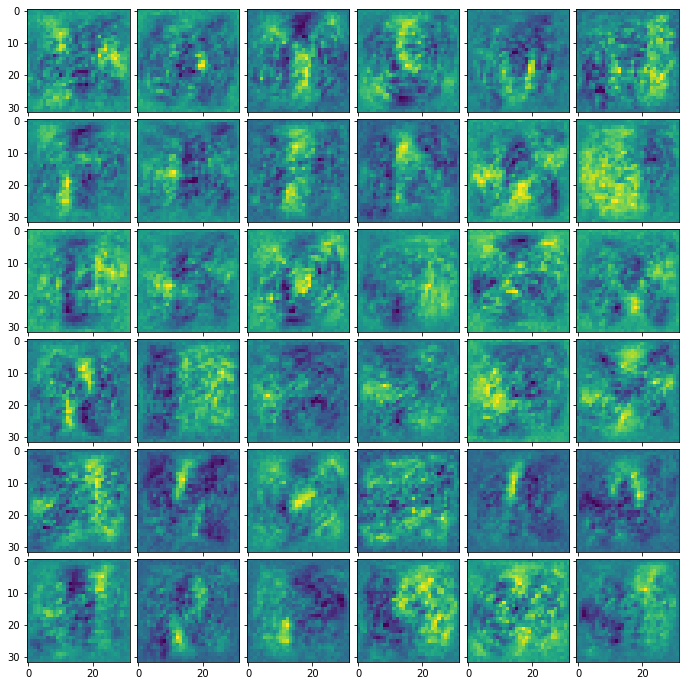

In [107]:
preds = np.zeros((36,36))
for i in range(36):
    preds[i, i] = 1

print(final_paramsW1.shape)
vis_im = (preds @ final_paramsWo.T) @  final_paramsW1.T
print(vis_im.shape)

fig = plt.figure(figsize=(12., 12.))
ims = []
print(vis_im.shape)
for i in range(36):
    ims.append(vis_im[i, :].reshape((32,32)))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(6, 6),  
                 axes_pad=0.1,  
                 )

for ax, im in zip(grid, ims):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

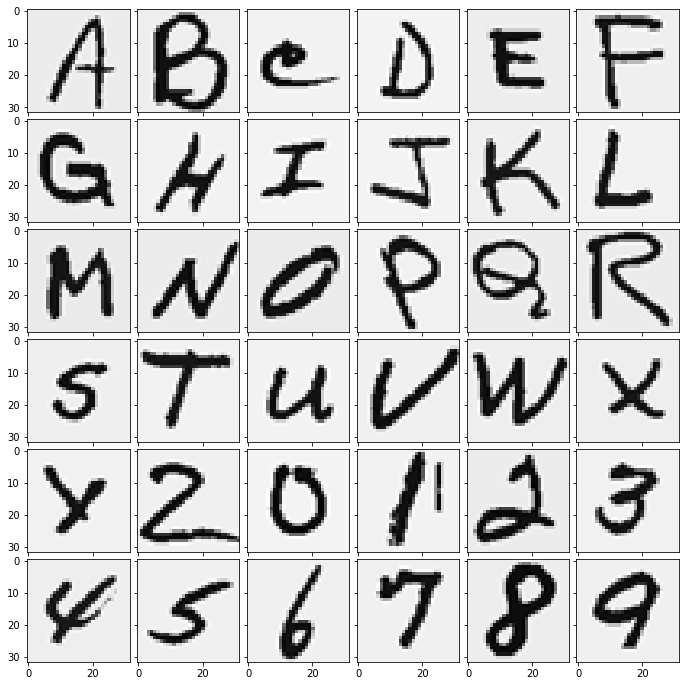

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

ims = []
idx=[]
for j in range((valid_y.shape[1])): # 36 class
    for i in range((valid_y.shape[0])): 
        if valid_y[i,j] == 1:
            idx.append(i)
            break            
for x in idx:
    ims.append(valid_x[x].reshape((32,32)).T)
        
fig = plt.figure(figsize=(12., 12.))

grid = ImageGrid(fig, 111,  
                 nrows_ncols=(6, 6),  
                 axes_pad=0.1,  
                 )
for ax, im in zip(grid, ims):
        ax.imshow(im, cmap = "gray")

plt.show()

### Q3.5 (4 points Code+WriteUp)
Visualize the confusion matrix for your best model for the test set. Comment on the top few pairs of classes that are most commonly confused.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [108]:
# Please put your code for Q3.4 here
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def traindatacf(train_x, train_y, valid_x, valid_y, test_x, test_y, max_iters, batch_size, learning_rate):
    hidden_size = 64

    batches = get_random_batches(train_x,train_y,batch_size)
    batch_num = len(batches)

    params = {}
    initialize_weights(1024,64,params,'layer1')
    initialize_weights(64,36,params,'output')

    for itr in range(max_iters):
        total_loss = 0
        total_acc = 0
        for xb,yb in batches:
            # training loop can be exactly the same as q2!
            # YOUR CODE HERE
                h1 = forward(xb, params, 'layer1', sigmoid)
                probs = forward(h1, params, 'output', softmax)
                ls, acc = compute_loss_and_acc(yb , probs)
                total_loss = total_loss + ls
                total_acc = total_acc + acc
                delta = probs - yb
                delta1 = backwards(delta, params, 'output', linear_deriv)
                delta2 = backwards(delta1, params, 'layer1', sigmoid_deriv)
                params['Woutput'] = params['Woutput'] - (learning_rate * params['grad_Woutput'])
                params['boutput'] = params['boutput'] - (learning_rate * params['grad_boutput'])
                params['Wlayer1'] = params['Wlayer1'] - (learning_rate * params['grad_Wlayer1'])
                params['blayer1'] = params['blayer1'] - (learning_rate * params['grad_blayer1'])

        total_acc = total_acc / len(batches)

    train_acc = 0

    h1tr = forward(train_x, params, 'layer1', sigmoid)
    probstr = forward(h1tr, params, 'output', softmax)
    vls, tracc = compute_loss_and_acc(train_y , probstr)
    train_acc = tracc
    test_acc = 0
    h1t = forward(test_x, params, 'layer1', sigmoid)
    probst = forward(h1t, params, 'output', softmax)
    vls, tacc = compute_loss_and_acc(test_y , probst)
    test_acc = tacc
    return probstr, probst

In [109]:
probstr, probst = traindatacf(train_x, train_y, valid_x, valid_y, test_x, test_y, 80, 64, 2.5e-3)

0.8616666666666667 0.7577777777777778


In [117]:
def compute_confusion_matrix(y: np.ndarray, probs: np.ndarray, confusion_matrix: np.ndarray):
    N = y.shape[0]
    C = y.shape[1]
    Y_max = np.array([np.arange(N), np.argmax(probs, axis = 1)])
    Y_pred = np.zeros((N,C))
    Y_pred[tuple((Y_max.T[:,0]).astype(int)), tuple((Y_max.T[:,1]).astype(int))] = 1
    for i in range(N):
        # print(np.argmax(y), np.argmax(Y_pred))
        confusion_matrix[np.argmax(y[i,:]), np.argmax(Y_pred[i,:])] += 1
    
    return confusion_matrix
        


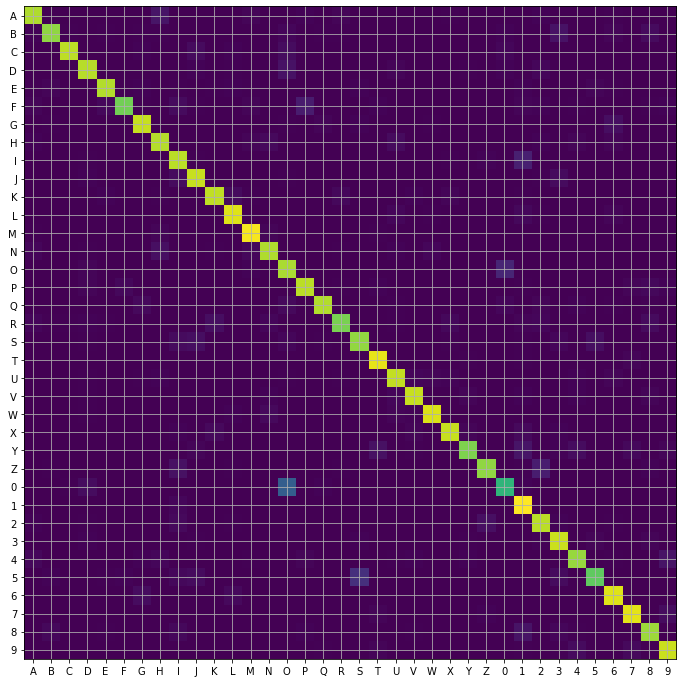

In [118]:
import matplotlib.pyplot as plt
confusion_matrix = np.zeros((train_y.shape[1],train_y.shape[1]))
# YOUR CODE HERE
confusion_matrix = compute_confusion_matrix(train_y, probstr, confusion_matrix)
# raise NotImplementedError()
import string
plt.figure(figsize=(12., 12.))
plt.imshow(confusion_matrix,interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.show()

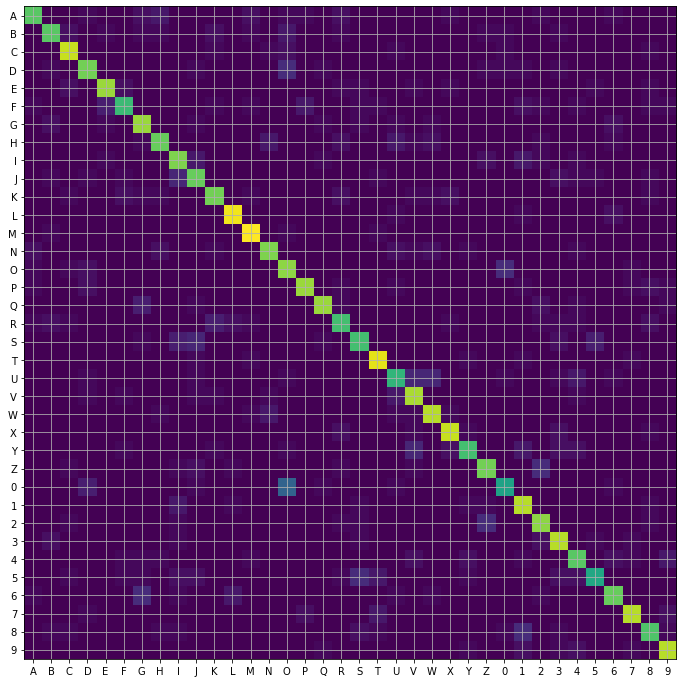

In [119]:
import matplotlib.pyplot as plt
confusion_matrix = np.zeros((train_y.shape[1],train_y.shape[1]))

confusion_matrix = compute_confusion_matrix(test_y, probst, confusion_matrix)

import string
plt.figure(figsize=(12., 12.))
plt.imshow(confusion_matrix,interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.show()

[0.94405726 0.94405726 0.94405726 ... 0.94405726 0.94405726 0.94405726]


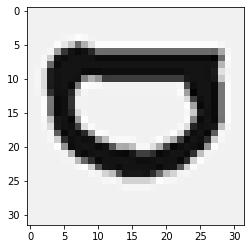

In [37]:
import matplotlib.pyplot as plt
print(train_x[1000])
vistrain = train_x[1000].reshape((32,32))
plt.imshow(vistrain, cmap = "gray")

In [14]:
import pickle
with open('q3_weights.pickle', 'wb') as handle:
    pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)